In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score, plot_confusion_matrix, plot_roc_curve, classification_report
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 4000

In [3]:
# Reading data
df=pd.read_csv('telecom_churn_data.csv')

In [4]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
df.shape

(99999, 226)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

# Filter high-value customers

Definition high-value customers as follows: 
- Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

 

In [8]:
all_columns = df.columns.tolist()
rech_col= [col for col in all_columns if 'rech' in col]
rech_col

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

We can create new feature as total_rech_amt_data using total_rech_data and av_rech_amt_data to capture amount utilized by customer for data.

In [9]:
# Replacing nan with 0
df['total_rech_data_6']=df['total_rech_data_6'].replace(np.NAN,0.0)
df['total_rech_data_7']=df['total_rech_data_7'].replace(np.NAN,0.0)
df['total_rech_data_8']=df['total_rech_data_8'].replace(np.NAN,0.0)
df['total_rech_data_9']=df['total_rech_data_9'].replace(np.NAN,0.0)

df['av_rech_amt_data_6'] = df['av_rech_amt_data_6'].replace(np.NaN,0.0)
df['av_rech_amt_data_7'] = df['av_rech_amt_data_7'].replace(np.NaN,0.0)
df['av_rech_amt_data_8'] = df['av_rech_amt_data_8'].replace(np.NaN,0.0)
df['av_rech_amt_data_9'] = df['av_rech_amt_data_9'].replace(np.NaN,0.0)


# let's add new column total recharge amount for data: total_rech_amt_data for calculating High Value customer process
df['total_rech_amt_data_6'] = df.av_rech_amt_data_6 * df.total_rech_data_6
df['total_rech_amt_data_7'] = df.av_rech_amt_data_7 * df.total_rech_data_7
df['total_rech_amt_data_8'] = df.av_rech_amt_data_8 * df.total_rech_data_8
df['total_rech_amt_data_9'] = df.av_rech_amt_data_9 * df.total_rech_data_9


In [10]:
# Drop the columns
df.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis=1, inplace=True)


In [11]:
# Find Average recharge amount for good phase i.e 6th and 7th month
good_phase_average_rech_amt = ( df['total_rech_amt_6']+df['total_rech_amt_7']+df['total_rech_amt_data_6']+df['total_rech_amt_data_7'])/ 2

In [12]:
# 70 percentile of the good_phase_average_rech_amt data
gd_phase_avg_rech_amt_70 = np.percentile(good_phase_average_rech_amt, 70.0)
print(f'70 Percentile of recharge amount is : {gd_phase_avg_rech_amt_70}')

# Keep high value customer data
df = df[good_phase_average_rech_amt >= gd_phase_avg_rech_amt_70]

print(f'Shape of high value customer data: {df.shape}')


70 Percentile of recharge amount is : 478.0
Shape of high value customer data: (30001, 222)


# Tag Churners

Tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9

In [13]:
df['churn']=np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0),1,0)

In [14]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014

In [15]:
# Deleting attribute correspond to churn phase
col_9 = [col for col in df.columns.to_list() if '_9' in col]
print(col_9)


['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_rech_amt_data_9']


In [16]:
# Deleting the churn month columns
df = df.drop(col_9, axis=1)
# Deleting the churn month columns
df = df.drop('sep_vbc_3g', axis=1)

In [17]:
df.churn.value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

In [18]:
# let us check what's the % of churned customers
print("The Percentage of churned customers is:" , round(100*(df.churn.astype("int").sum()/len(df)),2))


The Percentage of churned customers is: 8.14


In [19]:
df.shape

(30001, 169)

# Handling Missing values

In [20]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns


,null
max_rech_data_8,46.83
count_rech_2g_8,46.83
arpu_3g_8,46.83
night_pck_user_8,46.83
arpu_2g_8,46.83
date_of_last_rech_data_8,46.83
count_rech_3g_8,46.83
fb_user_8,46.83
date_of_last_rech_data_6,44.15
fb_user_6,44.15


In [21]:
# Listing the column which have more than 30% of missing values
col_list_missing=list(df_missing_columns.index[df_missing_columns['null']>30])
col_list_missing

['max_rech_data_8',
 'count_rech_2g_8',
 'arpu_3g_8',
 'night_pck_user_8',
 'arpu_2g_8',
 'date_of_last_rech_data_8',
 'count_rech_3g_8',
 'fb_user_8',
 'date_of_last_rech_data_6',
 'fb_user_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'arpu_3g_6',
 'night_pck_user_6',
 'arpu_2g_6',
 'count_rech_3g_6',
 'arpu_2g_7',
 'night_pck_user_7',
 'date_of_last_rech_data_7',
 'arpu_3g_7',
 'max_rech_data_7',
 'count_rech_3g_7',
 'count_rech_2g_7',
 'fb_user_7']

In [22]:
# Dropping columns which have more than 30% of missing values
df=df.drop(col_list_missing,axis=1)

In [23]:
df.shape

(30001, 145)

In [24]:
# List the date columns
date_cols = [k for k in df.columns.to_list() if 'date' in k]
print(date_cols) 


['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [25]:
# Dropping date columns which is not required for analysis.
df = df.drop(date_cols, axis=1)


In [26]:
# Dropping single value column
df = df.loc[:,df.apply(pd.Series.nunique) != 1]
df.shape

(30001, 129)

In [27]:
# Rechecking missing value percentage
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
std_og_t2f_mou_8,3.91
loc_og_mou_8,3.91
loc_og_t2c_mou_8,3.91
loc_ic_t2m_mou_8,3.91
og_others_8,3.91
loc_og_t2f_mou_8,3.91
loc_ic_t2f_mou_8,3.91
loc_ic_mou_8,3.91
loc_og_t2m_mou_8,3.91
std_og_mou_8,3.91


Remaining columns have less than 5% of missing value hence we drop those rows


In [28]:
# Dropping rows which have less than 5%
for col in df.columns:
    df = df[~df[col].isna()]


In [29]:
# Rechecking missing value percentage
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
mobile_number,0.0
loc_ic_mou_7,0.0
total_rech_amt_7,0.0
total_rech_amt_6,0.0
total_rech_num_8,0.0
total_rech_num_7,0.0
total_rech_num_6,0.0
ic_others_8,0.0
ic_others_7,0.0
ic_others_6,0.0


In [30]:
df.shape

(28504, 129)

In [31]:
# Dropping mobile number columns since this have unique values
df.drop('mobile_number',axis=1,inplace=True)

In [32]:
# Checking for correlations among feature. 
# Finding top 100 High correlated features
a= df.corr()
corr_0= a.where(np.triu(np.ones(a.shape), k=1).astype(np.bool))
corr_0= corr_0.unstack().dropna()
corr_0= pd.DataFrame(corr_0).reset_index()
corr_0.columns= ['Var 1','Var 2','correlation']
corr_0['abs_correlation']= np.abs(corr_0['correlation'])
corr_0.sort_values('abs_correlation', ascending= False).head(100)


,Var 1,Var 2,correlation,abs_correlation
4467,total_rech_amt_8,arpu_8,0.954004,0.954004
989,isd_og_mou_8,isd_og_mou_7,0.951378,0.951378
988,isd_og_mou_8,isd_og_mou_6,0.951039,0.951039
4372,total_rech_amt_7,arpu_7,0.944119,0.944119
4278,total_rech_amt_6,arpu_6,0.943556,0.943556
945,isd_og_mou_7,isd_og_mou_6,0.940105,0.940105
3066,total_ic_mou_6,loc_ic_mou_6,0.893949,0.893949
3225,total_ic_mou_8,loc_ic_mou_8,0.893926,0.893926
3145,total_ic_mou_7,loc_ic_mou_7,0.881928,0.881928
501,std_og_t2t_mou_8,onnet_mou_8,0.857676,0.857676


# Outliers Treatment

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Columns: 128 entries, arpu_6 to churn
dtypes: float64(102), int32(1), int64(25)
memory usage: 27.9 MB


In [34]:
df['churn'] = df['churn'].astype(object)

In [35]:
#List the numeric column
numeric_cols= df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'total_rech_amt_data_6',
       'total_rech_amt_data_7', 'total_rech_amt_data_8'],
      dtype='object', length=127)


In [36]:
df.shape


(28504, 128)

# Cap outliers in all numeric variables with k-sigma technique


Since we don't have actual business people to check the factfulness of the data, we will cap those features

In [37]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array


In [38]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))


Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [39]:
# cap outliers in the numeric columns
df[numeric_cols] = df[numeric_cols].apply(cap_outliers, axis=0)


# Deriving new features

Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [40]:
df['arpu_diff'] = df.arpu_8 - ((df.arpu_6 + df.arpu_7)/2)
df['onnet_mou_diff'] = df.onnet_mou_8 - ((df.onnet_mou_6 + df.onnet_mou_7)/2)
df['offnet_mou_diff'] = df.offnet_mou_8 - ((df.offnet_mou_6 + df.offnet_mou_7)/2)
df['roam_ic_mou_diff'] = df.roam_ic_mou_8 - ((df.roam_ic_mou_6 + df.roam_ic_mou_7)/2)
df['roam_og_mou_diff'] = df.roam_og_mou_8 - ((df.roam_og_mou_6 + df.roam_og_mou_7)/2)
df['loc_og_mou_diff'] = df.loc_og_mou_8 - ((df.loc_og_mou_6 + df.loc_og_mou_7)/2)
df['std_og_mou_diff'] = df.std_og_mou_8 - ((df.std_og_mou_6 + df.std_og_mou_7)/2)
df['isd_og_mou_diff'] = df.isd_og_mou_8 - ((df.isd_og_mou_6 + df.isd_og_mou_7)/2)
df['spl_og_mou_diff'] = df.spl_og_mou_8 - ((df.spl_og_mou_6 + df.spl_og_mou_7)/2)
df['total_og_mou_diff'] = df.total_og_mou_8 - ((df.total_og_mou_6 + df.total_og_mou_7)/2)
df['loc_ic_mou_diff'] = df.loc_ic_mou_8 - ((df.loc_ic_mou_6 + df.loc_ic_mou_7)/2)
df['std_ic_mou_diff'] = df.std_ic_mou_8 - ((df.std_ic_mou_6 + df.std_ic_mou_7)/2)
df['isd_ic_mou_diff'] = df.isd_ic_mou_8 - ((df.isd_ic_mou_6 + df.isd_ic_mou_7)/2)
df['spl_ic_mou_diff'] = df.spl_ic_mou_8 - ((df.spl_ic_mou_6 + df.spl_ic_mou_7)/2)
df['total_ic_mou_diff'] = df.total_ic_mou_8 - ((df.total_ic_mou_6 + df.total_ic_mou_7)/2)
df['total_rech_num_diff'] = df.total_rech_num_8 - ((df.total_rech_num_6 + df.total_rech_num_7)/2)
df['total_rech_amt_diff'] = df.total_rech_amt_8 - ((df.total_rech_amt_6 + df.total_rech_amt_7)/2)
df['max_rech_amt_diff'] = df.max_rech_amt_8 - ((df.max_rech_amt_6 + df.max_rech_amt_7)/2)
df['vol_2g_mb_diff'] = df.vol_2g_mb_8 - ((df.vol_2g_mb_6 + df.vol_2g_mb_7)/2)
df['vol_3g_mb_diff'] = df.vol_3g_mb_8 - ((df.vol_3g_mb_6 + df.vol_3g_mb_7)/2)

In [41]:
df['total_ic_mou_diff'].describe()

count    28504.000000
mean        -8.337833
std        170.430318
min      -1414.544191
25%        -62.843750
50%         -5.697500
75%         46.682500
max       1380.499546
Name: total_ic_mou_diff, dtype: float64

delete columns that belong to the churn month (9th month)


In [42]:
# delete all variables relating to 9th month
df = df.filter(regex='[^9]$', axis=1)
df.shape


(28504, 148)

# EDA

In [43]:
# create box plot for  6th, 7th and 8th month (Utility Function)
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()


#### 1.Recharge amount related variable

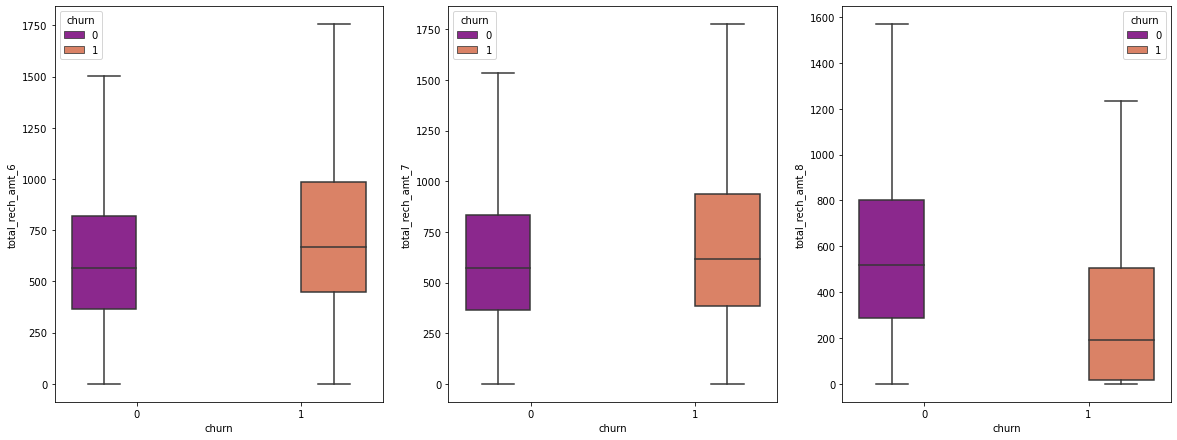

In [44]:
recharge_amnt_columns =  df.columns[df.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')


Analysis: We can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase).

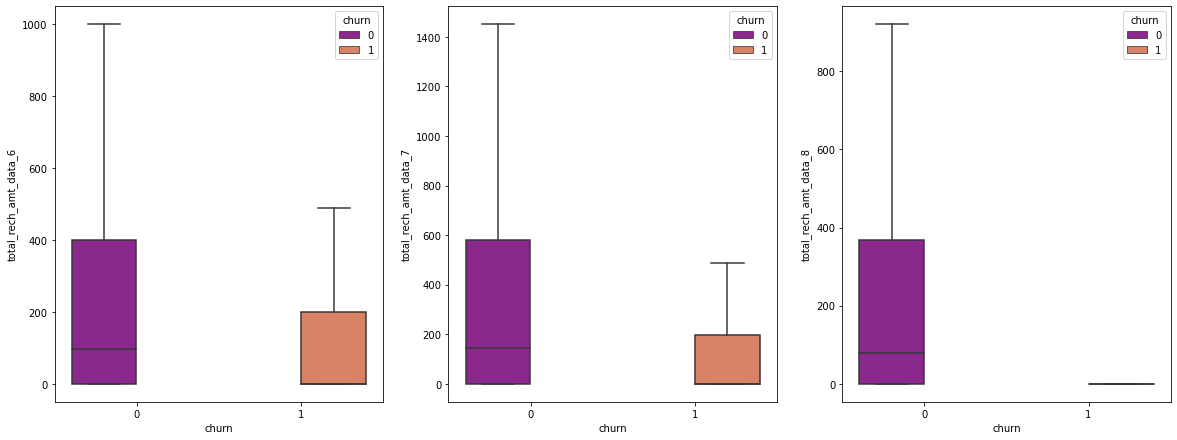

In [45]:
# Ploting for total recharge amount for data:
plot_box_chart('total_rech_amt_data')


Analysis: We can see that there is a huge drop in total recharge amount for data in the 8th month (action phase) for churned customers.

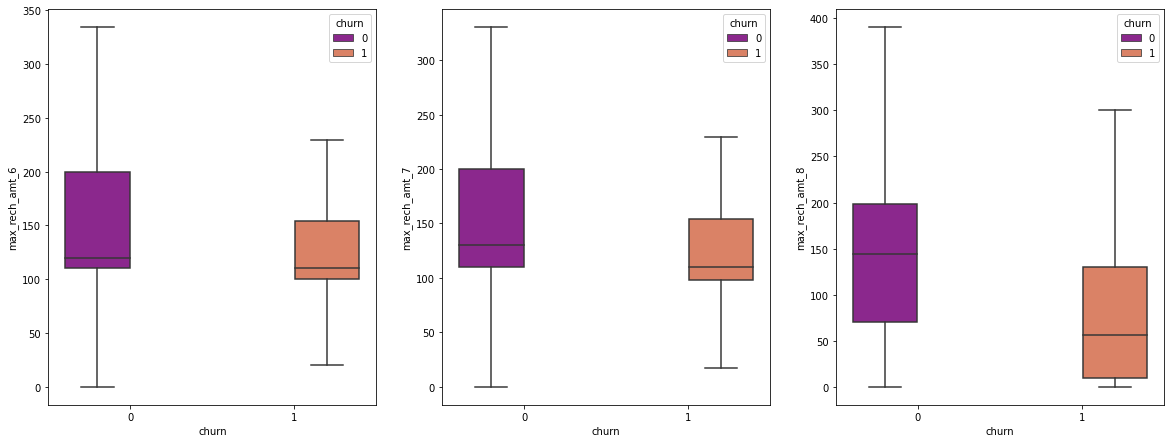

In [46]:
# Ploting for maximum recharge amount for data:
plot_box_chart('max_rech_amt')


Analysis: We can see that there is a huge drop in maximum recharge amount for data in the 8th month (action phase) for churned customers.



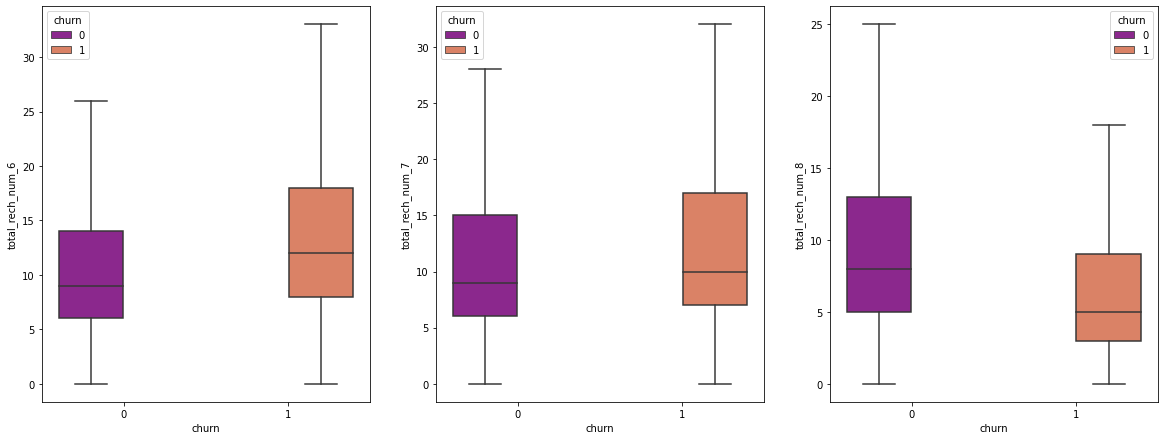

In [47]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')


Analysis: We can see that there is a huge drop in total recharge number also in the 8th month (action phase) for churned customers.



#### 2.Usage based variables

In [48]:
usage_2g_and_3g = df.columns[df.columns.str.contains('2g|3g',regex=True)]
print(usage_2g_and_3g)


Index(['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'vol_2g_mb_diff', 'vol_3g_mb_diff'],
      dtype='object')


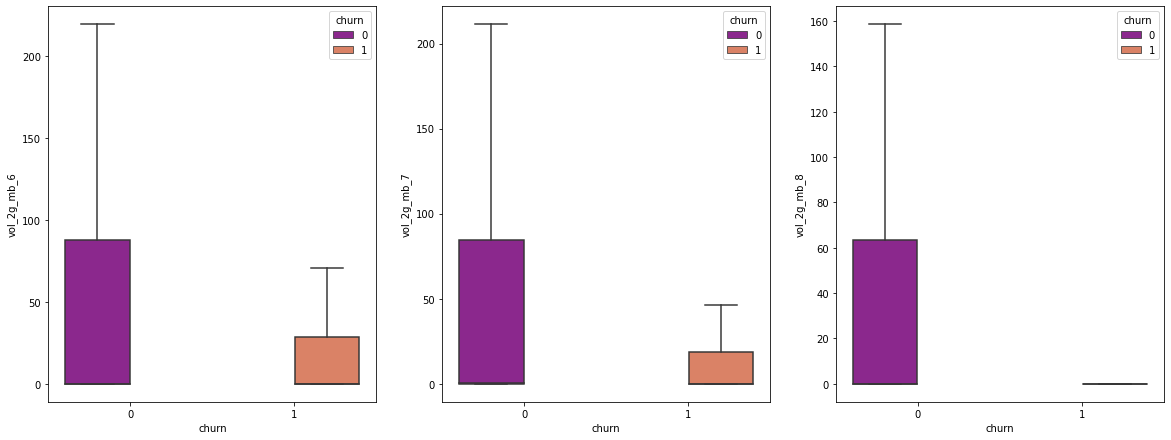

In [49]:
# Ploting for volume of 2G and 3G usage columns:
plot_box_chart('vol_2g_mb')


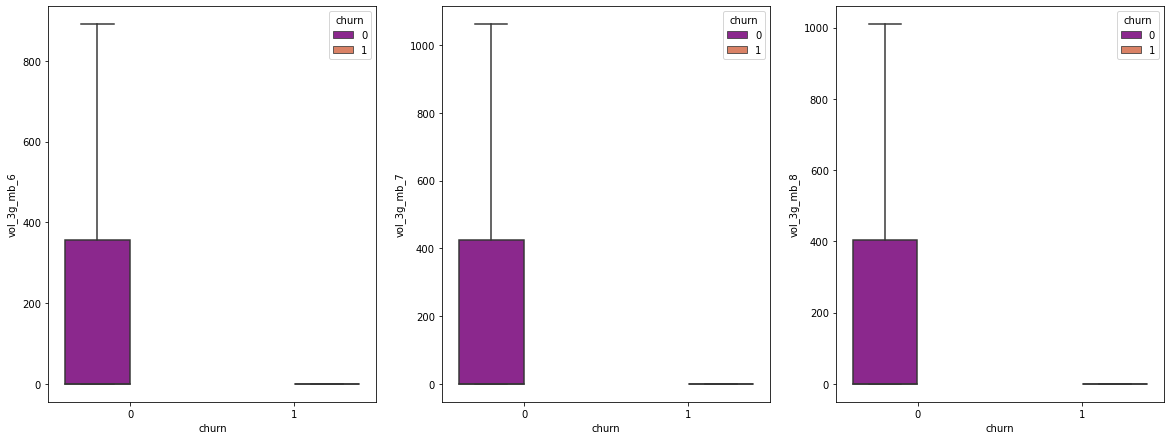

In [50]:
plot_box_chart('vol_3g_mb')


Analysis: We have two observations from above:

- 2G and 3G usage for churned customers drops in 8th month
- We also see that 2G/3G usage is higher for non-churned customers indicating that churned customers might be from areas where 2G/3G service is not properly available

# Bivariate analysis

In [51]:
# let's check monthly 2G/3G service schemes
monthly_subcription_2g_3g = df.columns[df.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()


['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

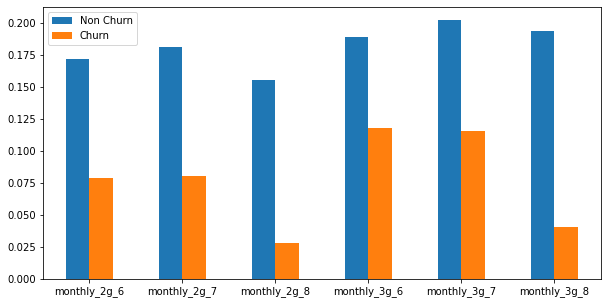

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.171359,0.181230,0.155514,0.188532,0.202132,0.193833
Churn,0.078850,0.080571,0.027816,0.117818,0.115688,0.040900


In [52]:
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

plot_mean_bar_chart(df, monthly_subcription_2g_3g)


Analysis: Again we can see a drop in monthly subscription for churned customers in 8th Month.



In [53]:
# let's check Volume based cost 
vbc_column = df.columns[df.columns.str.contains('vbc_',regex=True)]
vbc_column.tolist()


['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

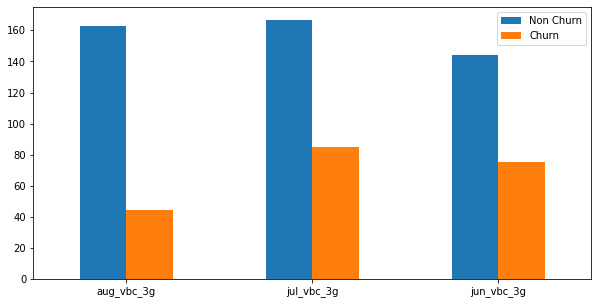

,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
Non Churn,162.756864,166.656446,144.064133
Churn,44.538749,85.055421,75.549356


In [54]:
plot_mean_bar_chart(df, vbc_column)


Analysis: Significantly it showing that volume based cost for 3G is much lower for Churned customers as compared to Non-Churned Customers and also there is a drop in vbc in 8th month



In [55]:
# Checking Service schemes with validity smaller than a month for 2G/3G
SC_2g_or_3g_col = df.columns[df.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

print(SC_2g_or_3g_col)


Index(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')


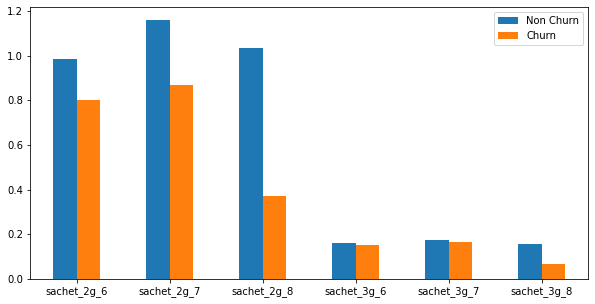

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,0.983647,1.159866,1.033686,0.160148,0.174061,0.157156
Churn,0.802704,0.869373,0.373206,0.152209,0.165119,0.068521


In [56]:
plot_mean_bar_chart(df, SC_2g_or_3g_col)


Analysis: We can see the drop in sachet services in 8th month for churned customers



#### 3. Average Revenue Per User

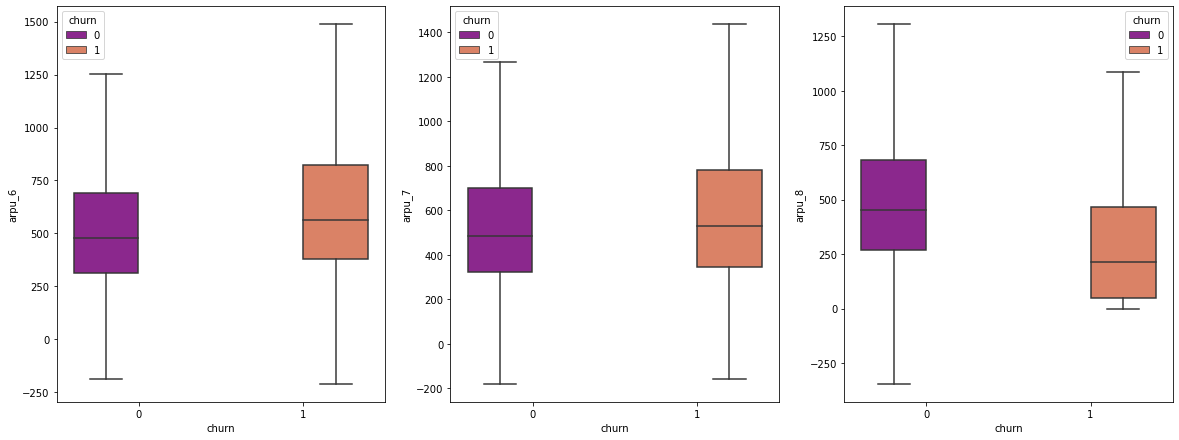

In [57]:
# Plotting arpu
arpu_cols=['arpu_6','arpu_7','arpu_8']
plot_box_chart('arpu')


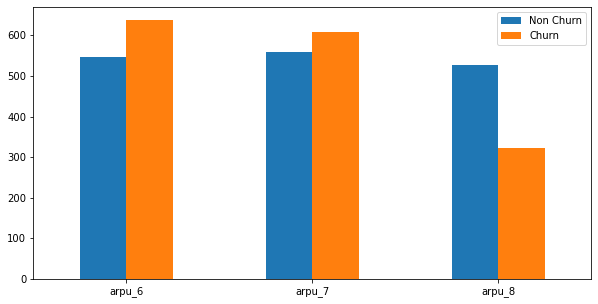

,arpu_6,arpu_7,arpu_8
Non Churn,545.542893,557.829130,527.404594
Churn,637.800195,609.172383,322.077929


In [58]:
plot_mean_bar_chart(df, arpu_cols)


Analysis: We can see that huge drops for Arpu in 8th month for churned customers



#### 4.Offnet Usage


In [59]:
offnet_usage_service_col = ['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']


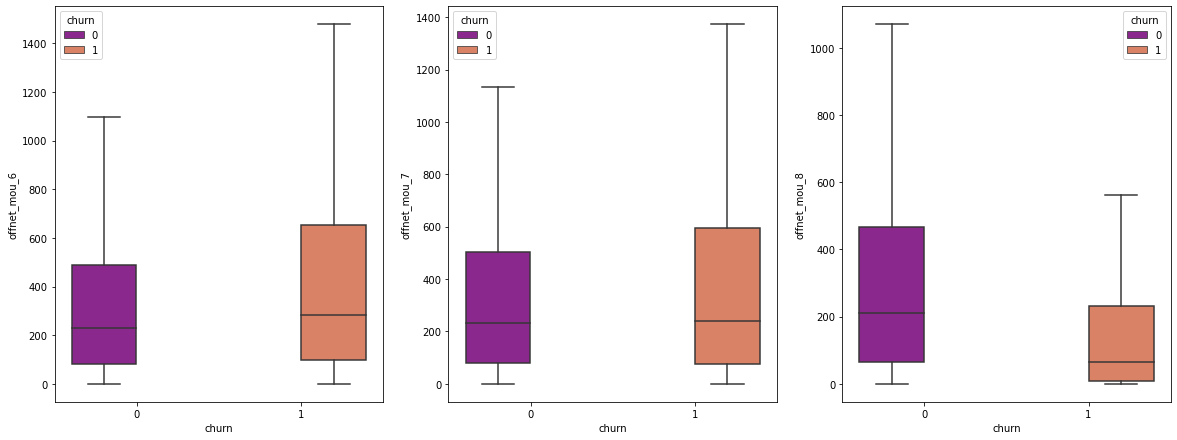

In [60]:
# Offnet mou values for churned and non churned customers
plot_box_chart('offnet_mou')


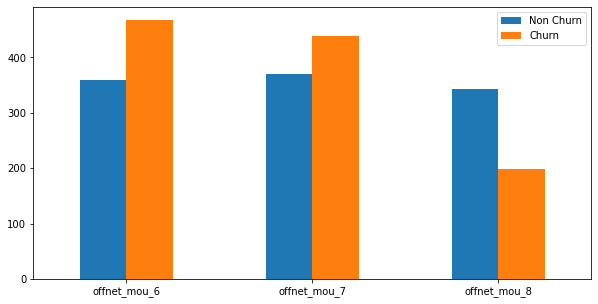

,offnet_mou_6,offnet_mou_7,offnet_mou_8
Non Churn,359.042531,369.901204,342.653739
Churn,467.617385,438.076620,199.115974


In [61]:
plot_mean_bar_chart(df, offnet_usage_service_col)


Analysis: We can see the drop for offnet mou services in the 8th month

#### 5.ONNET : All kind of calls within the same operator network

In [62]:
onnet_usage_service= ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']

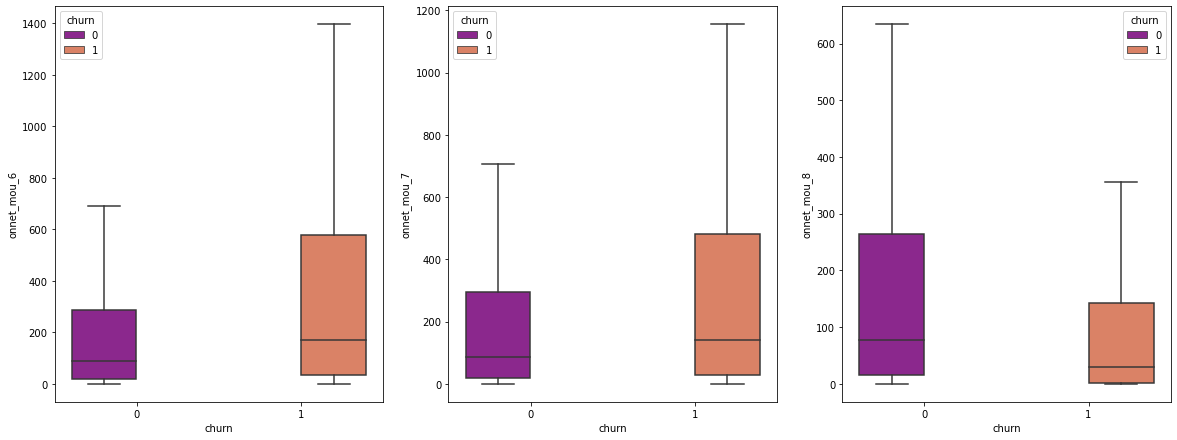

In [63]:
# Plotting onnet
plot_box_chart('onnet_mou')


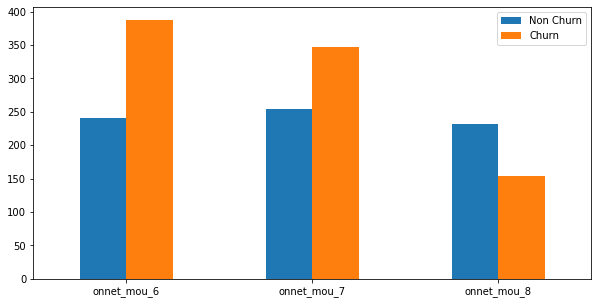

,onnet_mou_6,onnet_mou_7,onnet_mou_8
Non Churn,240.981647,254.273700,231.622709
Churn,387.320033,346.651589,154.461538


In [64]:
plot_mean_bar_chart(df, onnet_usage_service)


Analysis: We also see that there is a drop in Onnet usage in the 8th month for churned customers



# DATA PREPARATION

In [65]:
# Import library
from sklearn.model_selection import train_test_split

In [66]:
df['churn'] = df['churn'].astype(int)
y = df['churn']
X = df.drop('churn', axis=1)


In [67]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)


## Handling Class Imbalance


In [68]:
# Use SMOTE to take care of class imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [69]:
y_train.value_counts()


0    21520
1    21520
Name: churn, dtype: int64

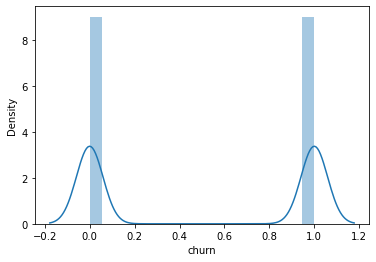

In [70]:
sns.distplot(y_train)
plt.show()

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])


In [72]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.021041,-0.272537,-0.093290,-0.221460,-0.161795,-0.350885,-0.102868,-0.213196,0.051606,1.136708,-0.359189,-0.392488,0.802323,-0.412102,-0.432569,0.716662,1.365353,0.235452,0.862031,0.855656,1.123905,0.949619,0.605303,-0.253940,-0.390389,-0.384723,-0.351864,0.893042,1.172038,0.804415,-0.582544,-0.556529,-0.429749,-0.527463,-0.568841,-0.461018,0.967668,0.587924,-0.196677,-0.715959,-0.723745,-0.552423,-0.1354,-0.128768,0.170185,0.173573,-0.149175,-0.471441,-0.411031,-0.056979,-0.043546,-0.320068,-0.221943,-0.130338,-0.198398,0.225619,0.028840,0.876162,0.582748,0.877487,0.733672,1.313776,0.720333,0.585614,0.606864,0.658718,-0.425380,-0.401940,-0.337067,-0.458516,-0.377621,-0.222407,1.005580,0.226636,0.050587,-0.420762,-0.424882,-0.297469,0.319445,0.325836,0.492542,-0.093118,-0.234547,5.617976,-0.264576,-0.224293,0.390701,0.173489,-0.079609,0.042284,-0.845904,-1.032014,-0.755437,-0.022848,-0.367136,-0.145610,0.847890,0.399868,0.581772,1.231780,1.238518,1.440553,-0.441138,-0.431454,-0.346923,-0.422603,-0.433724,-0.372670,-0.368895,-0.374392,-0.310499,-0.474164,-0.478864,-0.412050,-0.351519,-0.34721,-0.300102,-0.310022,-0.307436,-0.231833,0.045142,-0.384689,-0.409257,-0.398064,-0.444406,-0.460118,-0.351189,0.032293,-0.114384,0.264377,-0.948845,-0.774839,-0.498870,0.396370,0.450008,-0.460615,0.201522,0.064338,0.235779,0.853551,3.738220,0.234087,0.305416,0.050004,-0.031311,0.203946,0.114587
1,-0.976906,-0.858933,-0.512166,-0.713149,-0.687935,-0.496988,-0.676657,-0.598802,-0.557855,-0.340178,-0.359189,-0.392488,-0.363707,-0.412102,-0.432569,-0.449562,-0.455869,-0.210206,-0.244103,-0.390071,-0.397123,0.383007,0.501309,1.802359,-0.390389,-0.384723,-0.351864,-0.365643,-0.459965,-0.296473,-0.582544,-0.556529,-0.429749,-0.608548,-0.584002,-0.461018,1.923238,4.480314,2.070978,-0.758378,-0.704753,-0.534005,-0

In [73]:
X_train.shape

(43040, 147)

##### Scaling the test data


In [74]:
# Transform the test set
X_test[X_train.columns] = scaler.transform(X_test[X_train.columns])
X_test.head()


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff
23592,-1.039403,-0.878222,-0.539215,-0.736087,-0.704698,-0.574215,-0.914371,-0.886482,-0.739972,-0.340178,-0.359189,-0.392488,-0.363707,-0.412102,-0.432569,-0.529329,-0.513894,-0.445771,-0.742438,-0.728966,-0.617774,-0.394138,-0.386857,-0.359418,-0.390389,-0.384723,-0.351864,-0.755133,-0.741138,-0.627389,-0.582544,-0.556529,-0.429749,-0.610687,-0.584002,-0.461018,-0.22401,-0.215021,-0.196677,-0.775385,-0.738961,-0.552423,-0.1354,-0.128768,-0.111186,-0.544213,-0.565541,-0.471441,-0.411031,-0.056979,-0.043546,-1.048557,-0.995721,-0.763188,-0.335150,-0.274769,-0.318929,3.976190,3.139998,4.965790,-0.426972,-0.087307,-0.088302,2.525319,1.985118,3.297785,-0.425380,-0.401940,-0.337067,0.003298,0.073790,-0.106578,-0.252017,-0.249281,-0.219129,-0.225022,-0.168640,-0.244186,1.984824,1.522511,2.636335,-0.474897,-0.234547,-0.214176,-0.275159,-0.274733,-0.242463,-0.228880,-0.22757,-0.196879,-1.222331,-1.155700,-0.891837,-1.024014,-0.845690,-0.479135,0.864935,0.838179,1.010637,-0.993084,-0.940002,-0.697833,-0.430556,-0.372758,-0.330672,1.166082,0.506931,0.58450,-0.368895,-0.374392,-0.310499,-0.474164,-0.478864,-0.412050,2.087775,1.942751,2.292737,-0.310022,-0.307436,-0.231833,1.787684,0.348609,0.115740,-0.026542,-0.103706,-0.157560,-0.003673,0.436005,0.376197,0.407698,-0.041779,-0.030432,0.292716,0.445957,0.054913,0.137071,0.480956,1.548503,-0.026187,0.106914,0.292778,1.217042,0.457795,0.476845,0.236536,0.175941,-0.397189
29640,-1.392515,-1.367925,-0.818524,-0.736087,-0.704698,-0.574215,-0.895686,-0.886482,-0.739972,-0.340178,-0.359189,-0.392488,-0.363707,-0.412102,-0.432569,-0.529329,-0.513894,-0.445771,-0.742438,-0.728966,-0.617774,-0.394138,-0.386857,-0.359418,-0.390389,-0.384723,-0.351864,-0.755133,-0.741138,-0.627389,-0.582544,-0.556529,-0.429749,-0.610687,-0.584002,-0.461018,-0.22401,-0.215021,-0.196677

In [75]:
X_test.shape

(5701, 147)

# Modeling using PCA


In [76]:
#Import PCA
from sklearn.decomposition import PCA


In [77]:
pca = PCA(random_state=42)

In [78]:
# Fit train set on PCA
pca.fit(X_train)


PCA(random_state=42)

In [79]:
# Principal components
pca.components_


array([[ 6.81409387e-02,  9.93878877e-02,  1.57540580e-01, ...,
         4.82567596e-02,  3.14493457e-02,  1.25570306e-02],
       [ 1.62392816e-01,  1.51633025e-01,  4.91373123e-02, ...,
        -1.13560075e-02,  3.30138681e-02,  1.63452645e-02],
       [-5.44495604e-02,  4.83860505e-02,  1.81689418e-01, ...,
         1.23193577e-01,  3.14329014e-02,  4.82063662e-02],
       ...,
       [ 0.00000000e+00, -6.43842358e-16,  6.99496820e-16, ...,
        -1.45790439e-02,  9.96906709e-02,  3.66228775e-02],
       [-0.00000000e+00,  7.97143304e-17,  4.59847927e-16, ...,
        -5.14293831e-02,  2.19938299e-02, -3.06640920e-01],
       [ 3.20248179e-01,  3.23470977e-01, -6.69590637e-01, ...,
        -1.79904345e-16, -1.83880688e-16,  3.13984949e-16]])

In [80]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)


[0.11763448 0.21177019 0.27447303 0.32173064 0.36071219 0.39859143
 0.43094005 0.4577168  0.48122957 0.50259877 0.52357446 0.54242931
 0.56026206 0.57777168 0.59368544 0.60893933 0.62357528 0.63807645
 0.65145921 0.66481661 0.67763921 0.68959985 0.70134003 0.71255385
 0.72357026 0.73387446 0.74397092 0.75396068 0.7632711  0.7725698
 0.78134302 0.78945202 0.79739804 0.80518592 0.81266609 0.81966841
 0.82660898 0.83315314 0.83951731 0.84558882 0.85115441 0.85663102
 0.86195374 0.86706998 0.87216259 0.87715164 0.88194737 0.88647688
 0.89089989 0.89504939 0.89907024 0.90288291 0.90662711 0.91028054
 0.91386373 0.9173757  0.92072441 0.9240162  0.9271849  0.93017091
 0.93306541 0.93589906 0.93860556 0.94127558 0.94383329 0.94636951
 0.94875753 0.95105837 0.95330855 0.9554855  0.95751158 0.95950702
 0.96147321 0.96335854 0.96522103 0.96701987 0.96880795 0.97054834
 0.97221444 0.97386428 0.97544321 0.97698347 0.97849834 0.97998108
 0.98140263 0.98277607 0.98413934 0.98541684 0.98666172 0.98781

Text(0, 0.5, 'Cumulative Variance')

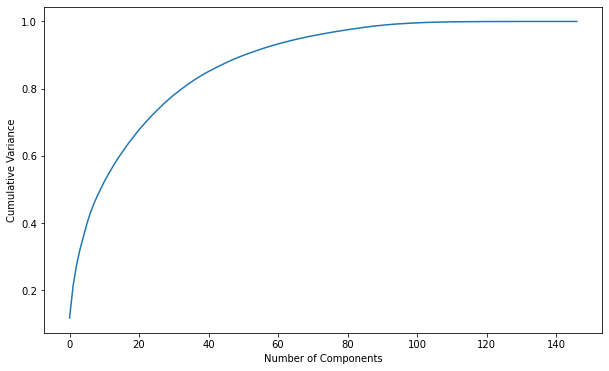

In [81]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')


We can see that 60 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.



Performing PCA with 60 components

In [82]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [83]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [84]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

In [85]:
# Transform to test data
X_test_pca = pca_final.transform(X_test)


###### An appropriate evaluation metric which reflects this business goal is sensitivity since it is more important to identify churners than the non-churners accurately

### LOGISTIC REGRESSION WITH PCA

In [86]:
# Importing scikitlearn logistic regression model
from sklearn.linear_model import LogisticRegression

In [87]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [88]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [89]:
#Creating kfold objecct with 5 splits
fold=KFold(n_splits=5,shuffle=True,random_state=4)

#Params
params={'C': [0.01,0.1,1,10,100,1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv=GridSearchCV(estimator=LogisticRegression(),
                     param_grid=params,
                     scoring='recall',
                     cv=fold,
                      verbose=1,
                      return_train_score=True)
#Fit the model
model_cv.fit(X_train_pca,y_train)
                    

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [90]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.330067,0.154242,0.006358,0.002234,0.01,{'C': 0.01},0.841833,0.837448,0.846922,0.843808,0.854772,0.844956,0.005791,1,0.846626,0.846801,0.845890,0.842834,0.843208,0.845072,0.001706
1,0.199720,0.058590,0.006203,0.001154,0.1,{'C': 0.1},0.842538,0.837215,0.847154,0.843115,0.854541,0.844913,0.005760,5,0.846858,0.847034,0.845948,0.842776,0.844663,0.845456,0.001582
2,0.286852,0.150061,0.006347,0.001051,1,{'C': 1},0.842773,0.836982,0.847154,0.843115,0.854311,0.844867,0.005728,6,0.846916,0.847034,0.846006,0.842776,0.844663,0.845479,0.001596
3,0.418889,0.319406,0.010555,0.007487,10,{'C': 10},0.842773,0.836982,0.847387,0.843115,0.854311,0.844913,0.005747,2,0.846858,0.846976,0.846006,0.842776,0.844605,0.845444,0.001580
4,0.267082,0.078908,0.006246,0.000942,100,{'C': 100},0.842773,0.836982,0.847387,0.843115,0.854311,0.844913,0.005747,2,0.846858,0.846976,0.846006,0.842776,0.844605,0.845444,0.001580
5,0.199201,0.039067,0.008818,0.004585,1000,{'C': 1000},0.842773,0.836982,0.847387,0.843115,0.854311,0.844913,0.005747,2,0.846858,0.846976,0.846006,0.842776,0.844605,0.845444,0.001580


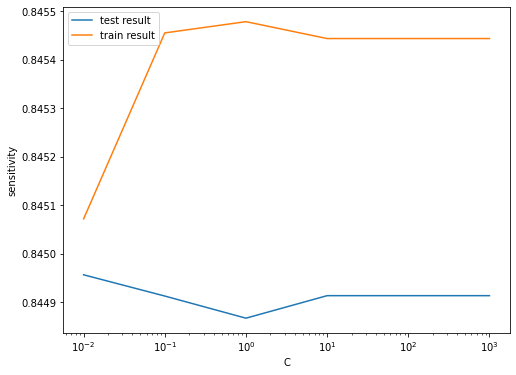

In [91]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')


In [92]:
# Best score with best C
best_score=model_cv.best_score_
best_C=model_cv.best_params_['C']
print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))


 The highest test sensitivity is 0.844956493986096 at C = 0.01


### Logistic Regression with optimal C


In [93]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)


In [94]:
# Fit the model on the train set
log_pca_model=logistic_pca.fit(X_train_pca,y_train)

Prediction on train set


In [95]:
y_train_pred=log_pca_model.predict(X_train_pca)

In [96]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)


[[17392  4128]
 [ 3335 18185]]


In [97]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [98]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))


Accuracy: 0.8266031598513011
Sensitivity: 0.8450278810408922
Specificity: 0.80817843866171


#### Prediction on test data

In [99]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)


In [100]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[4379 1009]
 [  64  249]]


In [101]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [102]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))


Accuracy: 0.811787405718295
Sensitivity: 0.7955271565495208
Specificity: 0.812731997030438


*Model summary*

Train set
- Accuracy = 0.82
- Sensitivity = 0.84
- Specificity = 0.80

Test set
- Accuracy = 0.81
- Sensitivity = 0.79
- Specificity = 0.81


# Decision Tree with PCA


In [103]:
#Importing decision tree classifier

from sklearn.tree import DecisionTreeClassifier


#### Hyperparamenter Tuning

In [104]:
#Create the parameter grid
param_grid={
    'max_depth':range(5,15,5),
    'min_samples_leaf':range(50,150,50),
    'min_samples_split':range(50,150,50)
}

In [105]:
# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [106]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.172718,0.132366,0.011333,0.003768,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.762546,0.812965,0.786942,0.779275,0.749071,0.778160,0.021816,7
1,2.288173,0.026560,0.009202,0.001586,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.762546,0.812965,0.786942,0.779275,0.749071,0.778160,0.021816,7
2,2.286057,0.047290,0.009738,0.002810,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.762082,0.814591,0.787407,0.778346,0.752091,0.778903,0.021671,5
3,2.057191,0.198221,0.007063,0.001575,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.762082,0.814591,0.787407,0.778346,0.752091,0.778903,0.021671,5
4,3.501266,0.084682,0.009267,0.002440,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.827602,0.835037,0.821329,0.832017,0.804600,0.824117,0.010793,2
5,3.587643,0.024373,0.009841,0.001244,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.828764,0.835037,0.820400,0.832017,0.804600,0.824164,0.010936,1
6,3.416292,0.056912,0.008066,0.001808,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.795307,0.820864,0.817147,0.783690,0.800651,0.803532,0.013824,3
7,3.435990,0.037186,0.009062,0.000741,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.795307,0.820864,0.817147,0.783690,0.800651,0.803532,0.013824,3


In [107]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)


Best sensitivity:- 0.824163568773234
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


### Model with optimal parameter


In [108]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [109]:
#### Prediction on Train dataset
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)


In [110]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)


[[18439  3081]
 [ 3299 18221]]


In [111]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [112]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))


Accuracy: 0.8517657992565055
Sensitivity: 0.8467007434944238
Specificity: 0.8568308550185874


### Prediction on test set


In [113]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)


In [114]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[4489  899]
 [ 109  204]]


In [115]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [116]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))


Accuracy: 0.8231889142255745
Sensitivity: 0.6517571884984026
Specificity: 0.8331477357089829


*Model summary*

Train set
- Accuracy = 0.85
- Sensitivity = 0.84
- Specificity = 0.85

Test set
- Accuracy = 0.82
- Sensitivity = 0.65
- Specificity = 0.83


# Randomforest classifier with PCA

In [117]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier


In [118]:
"""**Taking around 30 mins to run**
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)"""

"**Taking around 30 mins to run**\nparam_grid = {\n    'max_depth': range(5,10,5),\n    'min_samples_leaf': range(50, 150, 50),\n    'min_samples_split': range(50, 150, 50),\n    'n_estimators': [100,200,300], \n    'max_features': [10, 20]\n}\n# Create a based model\nrf = RandomForestClassifier()\n# Instantiate the grid search model\ngrid_search = GridSearchCV(estimator = rf, \n                           param_grid = param_grid, \n                           cv = 3,\n                           n_jobs = -1,\n                           verbose = 1, \n                           return_train_score=True)\n\n# Fit the model\ngrid_search.fit(X_train_pca, y_train)"

In [119]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)


In [120]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)


RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

In [121]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)


In [122]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)


[[18681  2839]
 [ 4897 16623]]


In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [124]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))


Accuracy: 0.8202602230483271
Sensitivity: 0.7724442379182156
Specificity: 0.8680762081784387


In [125]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)


In [126]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[4683  705]
 [  99  214]]


In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [128]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))


Accuracy: 0.858972110156113
Sensitivity: 0.6837060702875399
Specificity: 0.8691536748329621


*Model summary*

Train set
- Accuracy = 0.82
- Sensitivity = 0.77
- Specificity = 0.86

Test set
- Accuracy = 0.85
- Sensitivity = 0.68
- Specificity = 0.86


Conclusion with PCA Model evaluation:

Our ultimate goal is to achieve highest sensitivity which we have achieved in Basic Logistic regression model other than Random forest and Decision tree model


# Without PCA

In [129]:
#Importing stats model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [130]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())


In [131]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()


In [132]:
# Summary
log_no_pca


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43040
Model:                            GLM   Df Residuals:                    42912
Model Family:                Binomial   Df Model:                          127
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17018.
Date:                Tue, 09 May 2023   Deviance:                       34036.
Time:                        15:00:45   Pearson chi2:                 1.50e+05
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4487
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2268      0.016    -14.240      0.000      -0.258      -0.196
arpu_6                    0.1958      0.054      3.645      0.000       0.091       0.301
arpu_7                    0.6166      0.059     10.414      0.000       0.501       0.733
arpu_8                    0.6155      0.043     14.153      0.000       0.530       0.701
onnet_mou_6              -0.3705      0.123     -3.024      0.002      -0.611      -0.130
onnet_mou_7               0.2549      0.124      2.061      0.039       0.013       0.497
onnet_mou_8              -0.6088      0.078     -7.819      0.000      -0.761      -0.456
offnet_mou_6             -0.1073      0.109     -0.981      0.327      -0.322       0.107
offnet_mou_7              0.2576      0.122      2.111      0.035       0.018       0.497
offnet_mou_8             -0.4928      0.060     -8.278      0.000      -0.610      -0.376
roam_ic_mou_6            -0.1008      0.031     -3.288      0.001      -0.161      -0.041
roam_ic_mou_7             0.2425      0.032      7.575      0.000       0.180       0.305
roam_ic_mou_8             0.0245      0.015      1.588      0.112      -0.006       0.055
roam_og_mou_6             0.1714      0.035      4.932      0.000       0.103       0.240
roam_og_mou_7             0.0075      0.037      0.205      0.838      -0.064       0.079
roam_og_mou_8             0.2744      0.021     12.897      0.000       0.233       0.316
loc_og_t2t_mou_6          0.2993      0.075      3.976      0.000       0.152       0.447
loc_og_t2t_mou_7         -0.0052      0.082     -0.063      0.950      -0.167       0.156
loc_og_t2t_mou_8         -0.6454      0.085     -7.571      0.000      -0.812      -0.478
loc_og_t2m_mou_6         -0.0601      0.100     -0.598      0.550      -0.257       0.137
loc_og_t2m_mou_7          0.0049      0.114      0.043      0.966      -0.218       0.228
loc_og_t2m_mou_8         -0.9916      0.116     -8.538      0.000      -1.219      -0.764
loc_og_t2f_mou_6          0.1047      0.028      3.733      0.000       0.050       0.160
loc_og_t2f_mou_7         -0.2478      0.031     -7.937      0.000      -0.309      -0.187
loc_og_t2f_mou_8          0.0082      0.029      0.288      0.774      -0.048       0.064
loc_og_t2c_mou_6         -0.0168      0.017     -0.961      0.336      -0.051       0.017
loc_og_t2c_mou_7         -0.0687      0.020     -3.481      0.000      -0.107      -0.030
loc_og_t2c_mou_8          0.1561      0.019      8.196      0.000       0.119       0.193
loc_og_mou_6              0.3060      0.168      1.816      0.069      -0.024       0.636
loc_og_mou_7              0.2839      0.167      1.703      0.089      -0.043       0.611
loc_og_mou_8              0.8173      0.093      8.814      0.000       0.636       0.999
std_og_t2t_mou_6       

# Feature Selection Using RFE


In [133]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()


In [134]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)


In [135]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)



Index(['roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'onnet_mou_diff'],
      dtype='object')


In [137]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X


# Model-1 with RFE selected columns


In [138]:
# Adding constant to X_train
X_train_sm1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
logm1 = sm.GLM(y_train, X_train_sm1, family=sm.families.Binomial())

# Fit the model
logm1 = logm1.fit()

logm1.params


const                -0.187468
roam_og_mou_8         0.473540
loc_og_t2t_mou_8     -0.510954
loc_og_t2m_mou_8     -0.730935
loc_og_mou_8          0.586444
std_og_t2t_mou_7     -0.123413
loc_ic_t2m_mou_7      0.559334
loc_ic_t2m_mou_8     -1.168180
spl_ic_mou_8         -0.507172
total_rech_num_7      0.536048
total_rech_num_8     -0.630061
last_day_rch_amt_8   -0.430354
monthly_2g_8         -0.479380
sachet_2g_8          -0.423494
monthly_3g_8         -0.398975
onnet_mou_diff       -0.387166
dtype: float64

In [139]:
#Printing the summary of logistic model1
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                43040
Model:                            GLM   Df Residuals:                    43024
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18724.
Date:                Tue, 09 May 2023   Deviance:                       37449.
Time:                        15:02:38   Pearson chi2:                 8.35e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4032
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1875      0

# Checking VIFs


In [140]:
get_vif(X_train[rfe_cols])

,Features,VIF
0,loc_og_mou_8,42.25
1,loc_og_t2m_mou_8,21.79
2,loc_og_t2t_mou_8,11.41
3,loc_ic_t2m_mou_8,3.89
4,loc_ic_t2m_mou_7,3.02
5,total_rech_num_8,2.53
6,total_rech_num_7,2.10
7,onnet_mou_diff,1.56
8,std_og_t2t_mou_7,1.50
9,last_day_rch_amt_8,1.31


In [141]:
# Removing loc_og_mou_8 column since it has highest VIF
rfe_cols = rfe_cols.to_list()
rfe_cols.remove('loc_og_mou_8')
print(rfe_cols)


['roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'onnet_mou_diff']


# Model 2

In [142]:
# Adding constant to X_train
X_train_sm2 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
logm2 = sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial())

# Fit the model
logm2 = logm2.fit()

logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43040
Model:                            GLM   Df Residuals:                    43025
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18739.
Date:                Tue, 09 May 2023   Deviance:                       37478.
Time:                        15:02:47   Pearson chi2:                 8.97e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4028
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1886      0.014    -13.130      0.000      -0.217      -0.160
roam_og_mou_8          0.4729      0.015     30.829      0.000       0.443       0.503
loc_og_t2t_mou_8      -0.2067      0.017    -12.260      0.000      -0.240      -0.174
loc_og_t2m_mou_8      -0.3406      0.024    -13.903      0.000      -0.389      -0.293
std_og_t2t_mou_7      -0.1267      0.015     -8.401      0.000      -0.156      -0.097
loc_ic_t2m_mou_7       0.5576      0.028     20.239      0.000       0.504       0.612
loc_ic_t2m_mou_8      -1.1767      0.038    -30.681      0.000      -1.252      -1.102
spl_ic_mou_8          -0.5077      0.022    -22.726      0.000      -0.551      -0.464
total_rech_num_7       0.5349      0.021     25.295      0.000       0.493       0.576
total_rech_num_8      -0.6282      0.022    -28.184      0.000      -0.672      -0.584
last_day_rch_amt_8    -0.4284      0.016    -26.458      0.000      -0.460      -0.397
monthly_2g_8          -0.4799      0.016    -29.423      0.000      -0.512      -0.448
sachet_2g_8           -0.4245      0.015    -27.390      0.000      -0.455      -0.394
monthly_3g_8          -0.3981      0.017    -23.896      0.000      -0.431      -0.365
onnet_mou_diff        -0.3878      0.018    -21.021      0.000      -0.424      -0.352
======================================================================================
"""

In [143]:
logm2.params

const                -0.188557
roam_og_mou_8         0.472896
loc_og_t2t_mou_8     -0.206743
loc_og_t2m_mou_8     -0.340565
std_og_t2t_mou_7     -0.126660
loc_ic_t2m_mou_7      0.557599
loc_ic_t2m_mou_8     -1.176720
spl_ic_mou_8         -0.507661
total_rech_num_7      0.534924
total_rech_num_8     -0.628161
last_day_rch_amt_8   -0.428365
monthly_2g_8         -0.479880
sachet_2g_8          -0.424462
monthly_3g_8         -0.398090
onnet_mou_diff       -0.387778
dtype: float64

In [144]:
get_vif(X_train[rfe_cols])

,Features,VIF
0,loc_ic_t2m_mou_8,3.89
1,loc_ic_t2m_mou_7,3.02
2,total_rech_num_8,2.52
3,loc_og_t2m_mou_8,2.16
4,total_rech_num_7,2.10
5,onnet_mou_diff,1.56
6,std_og_t2t_mou_7,1.50
7,last_day_rch_amt_8,1.31
8,loc_og_t2t_mou_8,1.24
9,sachet_2g_8,1.22


NOTE:
- Model 2 is stable and has p value <0.05, we can use it for further analysis
- No variable needs to drop as they all have good VIF value less than 5
- This model is acceptable as everything is under control

# Model Evaluation


In [145]:
# Getting the predicted value on the train set
y_train_pred = logm2.predict(X_train_sm2)
y_train_pred.head()


0    0.010766
1    0.161461
2    0.582214
3    0.042450
4    0.085767
dtype: float64

Creating a dataframe with the actual churn and the predicted probabilities


In [146]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.

y_train_pred_final.head()


,churn,churn_prob
0,0,0.010766
1,0,0.161461
2,0,0.582214
3,0,0.042450
4,0,0.085767


# Plotting the ROC Curve 

In [147]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


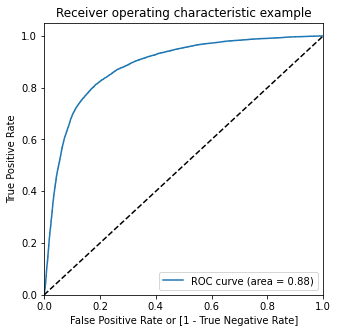

In [148]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])


Finding Optimal Probablity Cutoff Point


In [149]:
# Creating columns for different probablity cutoffs
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()


,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.010766,1,0,0,0,0,0,0,0,0,0
1,0,0.161461,1,1,0,0,0,0,0,0,0,0
2,0,0.582214,1,1,1,1,1,1,0,0,0,0
3,0,0.042450,1,0,0,0,0,0,0,0,0,0
4,0,0.085767,1,0,0,0,0,0,0,0,0,0


Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.


In [150]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
 

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.663243     0.979693     0.346794
0.2          0.2  0.729763     0.953253     0.506273
0.3          0.3  0.771678     0.921654     0.621701
0.4          0.4  0.797189     0.882528     0.711849
0.5          0.5  0.811036     0.831970     0.790102
0.6          0.6  0.810641     0.765706     0.855576
0.7          0.7  0.787663     0.667240     0.908086
0.8          0.8  0.718425     0.485920     0.950929
0.9          0.9  0.608713     0.237593     0.979833


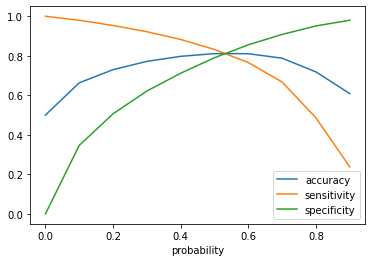

In [151]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()


0.5 is the approx. point where all the curves meet, so 0.5 seems to be our Optimal cutoff point for probability threshold .

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking *0.5* for acheiving higher sensitivity, which is our main goal.

Lets do mapping again using optimal cutoff point


In [152]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.010766,1,0,0,0,0,0,0,0,0,0,0
1,0,0.161461,1,1,0,0,0,0,0,0,0,0,0
2,0,0.582214,1,1,1,1,1,1,0,0,0,0,1
3,0,0.042450,1,0,0,0,0,0,0,0,0,0,0
4,0,0.085767,1,0,0,0,0,0,0,0,0,0,0


In [153]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))


Accuracy: 0.8110362453531599


In [154]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)


[[17003  4517]
 [ 3616 17904]]


In [155]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [156]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8319702602230483


In [157]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))


Specificity : 0.7901022304832713


### Testing the model on the test set


In [158]:
# Taking a copy of the test set
X_test_log = X_test.copy()


In [159]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[rfe_cols]


In [160]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)


In [161]:
# Predict on the test set
y_test_pred = logm2.predict(X_test_sm)


In [162]:
y_test_pred.head()

23592    0.011013
29640    0.247668
11357    0.724679
37103    0.160599
17466    0.025592
dtype: float64

In [163]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_test_pred1 = pd.DataFrame(y_test_pred)
y_test_pred1.head()


,0
23592,0.011013
29640,0.247668
11357,0.724679
37103,0.160599
17466,0.025592


In [164]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()


,churn
23592,0
29640,0
11357,0
37103,0
17466,0


In [165]:
# Removing index form the both dataframes for merging them side by side
y_test_pred1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [166]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_test_pred1], axis=1)


In [167]:
y_test_pred_final.head()


,churn,0
0,0,0.011013
1,0,0.247668
2,0,0.724679
3,0,0.160599
4,0,0.025592


In [168]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})


In [169]:
y_test_pred_final.head()


,churn,churn_prob
0,0,0.011013
1,0,0.247668
2,0,0.724679
3,0,0.160599
4,0,0.025592


In [170]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)



In [171]:
y_test_pred_final.head()


,churn,churn_prob,test_predicted
0,0,0.011013,0
1,0,0.247668,0
2,0,0.724679,1
3,0,0.160599,0
4,0,0.025592,0


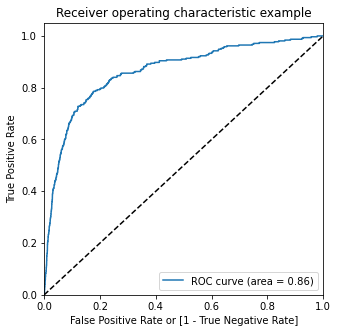

In [172]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final["churn"], y_test_pred_final["churn_prob"], drop_intermediate = False )

draw_roc(y_test_pred_final["churn"], y_test_pred_final["churn_prob"])


In [173]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)


[[4279 1109]
 [  63  250]]


In [174]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [175]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))


Accuracy: 0.7944220312225925


In [176]:
# Specificity
print("Specificity:", TN / float(TN+FP))

Specificity: 0.7941722345953972


In [177]:
# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

Sensitivity: 0.7987220447284346


*Model summary*

Train set
- Accuracy = 0.81
- Sensitivity = 0.83
- Specificity = 0.79

Test set
- Accuracy = 0.79
- Sensitivity = 0.79
- Specificity = 0.79


Final conclusion with no PCA
- We can see that the logistic model with no PCA has good sensitivity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression with PCA as it expliains the important predictor variables as well as the significance of each variable. The model also hels us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business.



We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.



# Recommendations:

- Variable loc_ic_t2m_mou_7 have positive coefficients (0.5576) means customer whose incoming call from other operator are likely to churn.
- Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
- Target the customers, whose outgoing others charge in July and incoming others on August are less.
- The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
- Local & STD Minutes of usage (incoming & outgoing) are the most affecting features on the customer churn.
- Lastday of recharge amount in the action phase also plays a crucial role in determing churn.
- Customised plans should be provided to such customers to stop them from churning.
- Promotional offers can also be very helpful
- Users whose maximum recharge amount is less than 200 even in the good phase, should have a tag and re-evaluated time to time as they are more likely to churn

# Plots of important predictors for churn and non churn customers


In [178]:
# Creating churn dataframe
data_churn = df[df['churn'] == 1]
# Creating not churn dataframe
data_non_churn = df[df['churn'] == 0]


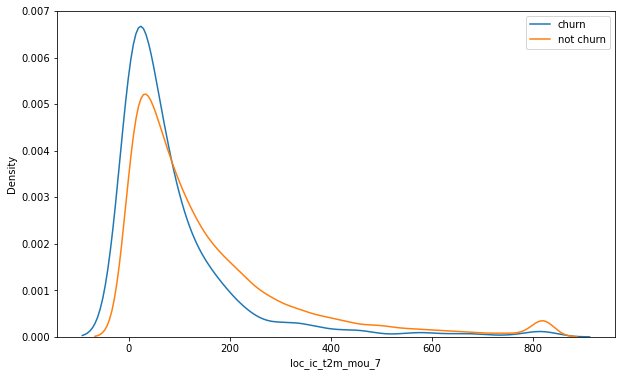

In [179]:
# Plotting loc_ic_t2m_mou_7 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['loc_ic_t2m_mou_7'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_ic_t2m_mou_7'],label='not churn',hist=False)
plt.legend()
plt.show()

Analysis: Customer whose incoming call from other operator are likely to churn than incoming call from other operator of non churn customer

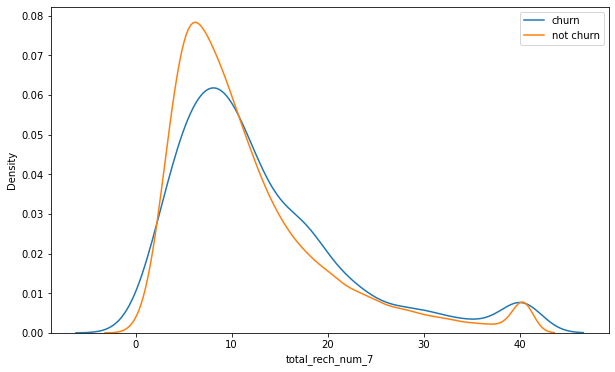

In [180]:
# Plotting total_rech_num_7 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['total_rech_num_7'],label='churn',hist=False)
sns.distplot(data_non_churn['total_rech_num_7'],label='not churn',hist=False)
plt.legend()
plt.show()

Analysis: Distribution of total recharge of month July also likely to churn customer

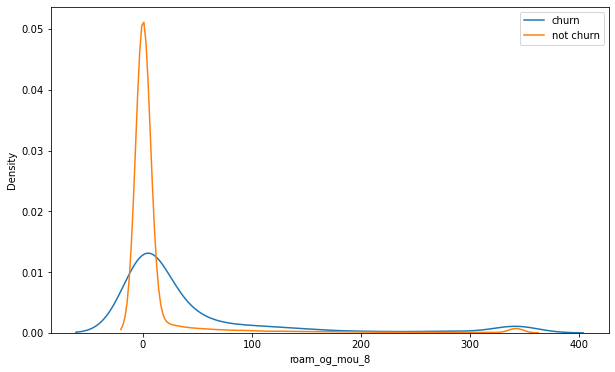

In [181]:
# Plotting roam_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['roam_og_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['roam_og_mou_8'],label='not churn',hist=False)
plt.legend()
plt.show()

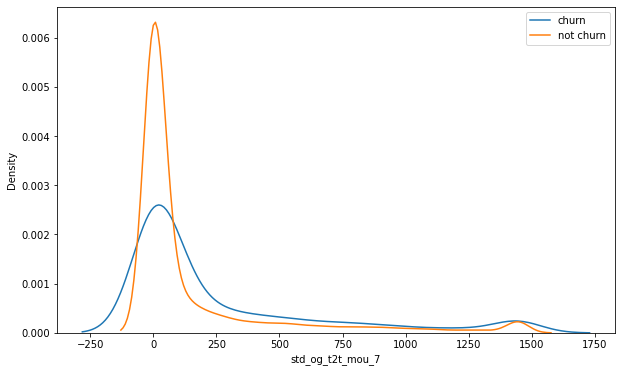

In [182]:
# Plotting std_og_t2t_mou_7 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['std_og_t2t_mou_7'],label='churn',hist=False)
sns.distplot(data_non_churn['std_og_t2t_mou_7'],label='not churn',hist=False)
plt.legend()
plt.show()

Analysis: STD outgoing customer or roaming valriable are likely to churn due to high roaming charges also leads to churn

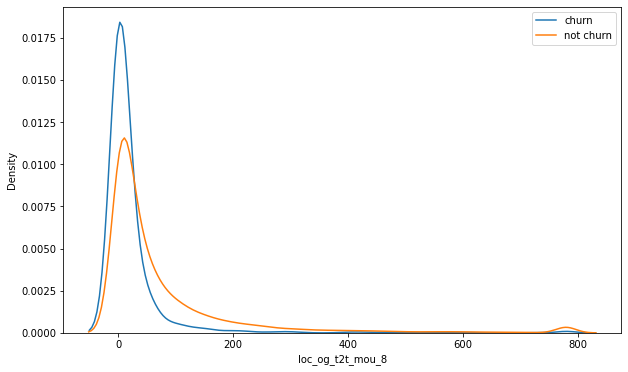

In [183]:
# Plotting loc_og_t2t_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['loc_og_t2t_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_og_t2t_mou_8'],label='not churn',hist=False)
plt.legend()
plt.show()

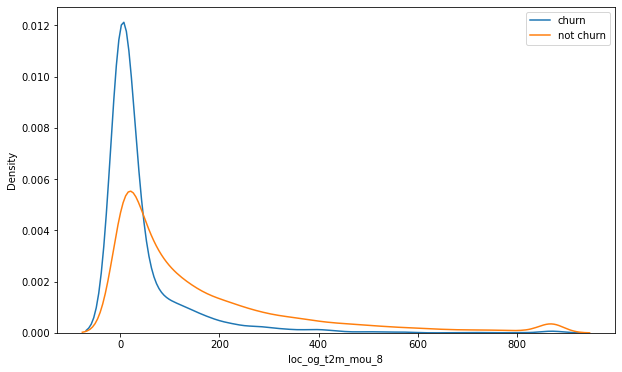

In [184]:
# Plotting loc_og_t2m_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['loc_og_t2m_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_og_t2m_mou_8'],label='not churn',hist=False)
plt.legend()
plt.show()

Analysis: Low Usage of outgoing call to same operator or other operator likely to churn than non churn because it is negatively correlated. 

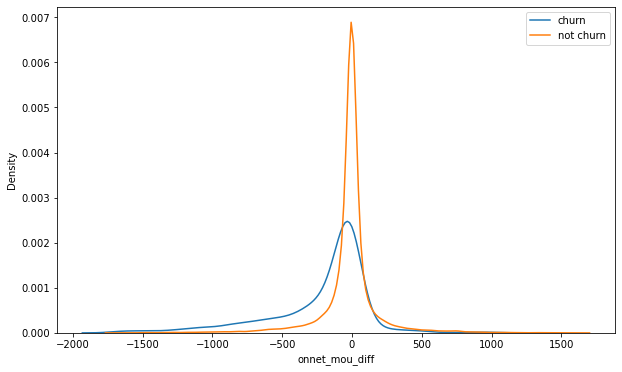

In [185]:
# Plotting onnet_mou_diff predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['onnet_mou_diff'],label='churn',hist=False)
sns.distplot(data_non_churn['onnet_mou_diff'],label='not churn',hist=False)
plt.legend()
plt.show()

Analysis: If onnet month of usage is lower we need to concentrate of customer who are more likely to churn.

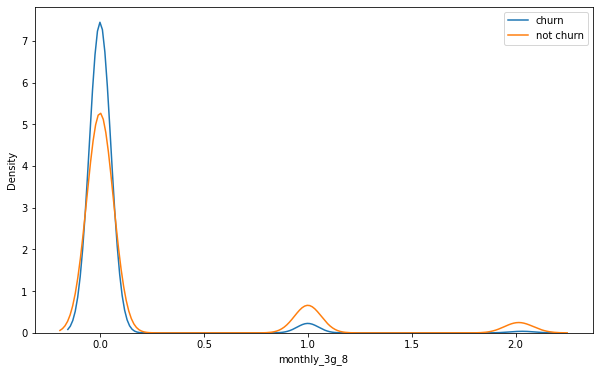

In [186]:
# Plotting monthly_3g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(data_non_churn['monthly_3g_8'],label='not churn',hist=False)
plt.legend()
plt.show()

In [187]:
Analysis: If customer monthly 3G recharge is low.Customers might be from areas where 2G/3G service is not properly available

SyntaxError: invalid syntax (1609597455.py, line 1)

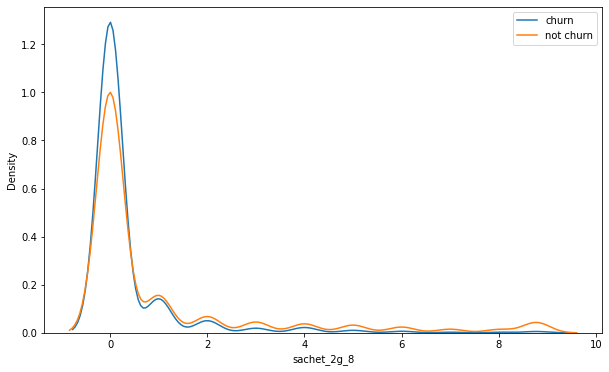

In [188]:
# Plotting sachet_2g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['sachet_2g_8'],label='churn',hist=False)
sns.distplot(data_non_churn['sachet_2g_8'],label='not churn',hist=False)
plt.legend()
plt.show()

Analysis: If customer recharge with smaller validity for 2g are likely to churn than non churn customer 
Customers might be from areas where 2G/3G service is not properly available

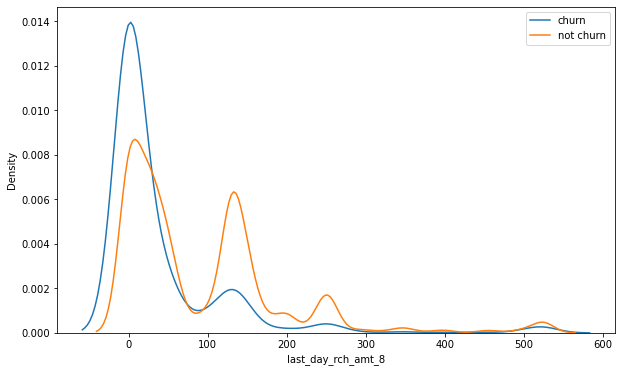

In [189]:
# Plotting last_day_rch_amt_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['last_day_rch_amt_8'],label='churn',hist=False)
sns.distplot(data_non_churn['last_day_rch_amt_8'],label='not churn',hist=False)
plt.legend()
plt.show()

Analysis: Customer who recharge last in the month of Aug are likely to churn. 